In [283]:
# !pip install missingno
# !pip install geopy

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
AirbnbBerlin_df = pd.read_csv('/content/drive/My Drive/Airbnb/Airbnb Berlin.csv', index_col=0)

In [287]:
AirbnbBerlin_df.groupby(['Listing ID', 'Host ID']).size().sort_values(ascending=False)

,,0
Listing ID,Host ID,
292864,286494,545
517425,2547002,526
652366,286494,496
127708,632174,479
571751,2547002,459
...,...,...
20069673,142645164,1
20071123,92834289,1
20081217,21547435,1


In [288]:
AirbnbBerlin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456961 entries, 0 to 456960
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              452805 non-null  float64
 1   review_date            452805 non-null  object 
 2   Reviewer ID            452805 non-null  float64
 3   Reviewer Name          452805 non-null  object 
 4   Comments               452595 non-null  object 
 5   Listing ID             456961 non-null  int64  
 6   Listing URL            456961 non-null  object 
 7   Listing Name           456756 non-null  object 
 8   Host ID                456961 non-null  int64  
 9   Host URL               456961 non-null  object 
 10  Host Name              456913 non-null  object 
 11  Host Since             456913 non-null  object 
 12  Host Response Time     398194 non-null  object 
 13  Host Response Rate     398194 non-null  object 
 14  Is Superhost           456913 non-null  o

In [289]:
df = AirbnbBerlin_df.copy()

# Data Preparation

In [290]:
# Display shape
df.shape

(456961, 46)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456961 entries, 0 to 456960
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              452805 non-null  float64
 1   review_date            452805 non-null  object 
 2   Reviewer ID            452805 non-null  float64
 3   Reviewer Name          452805 non-null  object 
 4   Comments               452595 non-null  object 
 5   Listing ID             456961 non-null  int64  
 6   Listing URL            456961 non-null  object 
 7   Listing Name           456756 non-null  object 
 8   Host ID                456961 non-null  int64  
 9   Host URL               456961 non-null  object 
 10  Host Name              456913 non-null  object 
 11  Host Since             456913 non-null  object 
 12  Host Response Time     398194 non-null  object 
 13  Host Response Rate     398194 non-null  object 
 14  Is Superhost           456913 non-null  o

In [292]:
df.groupby('Listing ID').size().sort_values(ascending=False)

,0
Listing ID,
292864,545
517425,526
652366,496
127708,479
571751,459
...,...
20069673,1
20071123,1
20081217,1


Notice, 'Listing ID' is repeated in mutiple rows, which means that the data need to be aggregated by 'Listing ID'.
Before aggregation we will Perform text cleaning, remove currency symbols & commas of some of clumns and clean and convert the numeric columns as was observed previously , which currently stored as an objects like 'Price' and 'Host Response Rate.

## Aggregate dataset by Listing ID

Aggregate the dataset by 'Listing ID'
- For numerical columns, we'll compute the mean
- For categorical columns, we'll take the first/or last value (assuming consistency)

In [293]:
# 1. Clean Text: Perform text cleaning, remove currency symbols & commas
# df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
# df['Host Response Rate'] = df['Host Response Rate'].replace('[\%,]', '', regex=True).astype(float)
# df['Host Response Rate'] = df['Host Response Rate'].astype(float)

# # Fix Postal Code incorrect values, remove '\n' and other irrelevant text
# df['Postal Code'] = df['Postal Code'].astype(str).str[:5]

In [294]:
# Aggregate the dataset by 'Listing ID'
# For numerical columns, we'll compute the mean
# For categorical columns, we'll take the first value (assuming consistency)

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns.difference(['Listing ID'])
aggregated_df = df.groupby('Listing ID').agg({**{col: 'mean' for col in numerical_cols},
                                              **{col: 'last' for col in categorical_cols}})

# aggregated_df = df.groupby('Listing ID').agg({**{col: 'mean' for col in numerical_cols},
#                                               **{col: lambda x: x.mode().iloc[0] if not x.mode().empty else None for col in categorical_cols}})

print(aggregated_df.shape)
df = aggregated_df.reset_index()

(23536, 45)


## Pre-cleaning

In [295]:
# Display shape
df.shape

(23536, 46)

In [296]:
# Display head(2) of remaining "df"
df.head(2)

,Listing ID,Accomodates,Accuracy Rating,Bathrooms,Bedrooms,Beds,Checkin Rating,Cleanliness Rating,Communication Rating,Guests Included,Host ID,Latitude,Location Rating,Longitude,Min Nights,Overall Rating,Review ID,Reviewer ID,Reviews,Square Feet,Value Rating,review_date,Reviewer Name,Comments,Listing URL,Listing Name,Host URL,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Is Exact Location,Property Type,Room Type,Price,First Review,Last Review,Instant Bookable,Business Travel Ready
0,2695,2.0,10.0,1.0,1.0,1.0,10.0,10.0,10.0,1.0,2986.0,52.54851,9.0,13.40455,2.0,100.0,3.303867e+08,4.097753e+07,7.0,NaN,10.0,04-21-19,Alessandra,Michael is kind host and our stay was very ple...,https://www.airbnb.com/rooms/2695,Prenzlauer Berg close to Mauerpark,https://www.airbnb.com/users/show/2986,Michael,09-16-08,within a day,50%,f,Prenzlauer Berg,Pankow,Berlin,10437,DE,Germany,t,Apartment,Private room,17.00,07-04-18,04-21-19,f,f
1,3176,4.0,9.0,1.0,1.0,2.0,9.0,9.0,9.0,2.0,3718.0,52.53500,10.0,13.41758,62.0,92.0,3.089398e+07,1.404133e+07,144.0,720.0,9.0,10-29-18,Sang Woo,Good,https://www.airbnb.com/rooms/3176,Fabulous Flat in great Location,https://www.airbnb.com/users/show/3718,Britta,10-19-08,within a day,50%,f,Prenzlauer Berg,Pankow,Berlin,10405.0,DE,Germany,t,Apartment,Entire home/apt,90.00,06-20-09,10-29-18,f,f


On first sight, most features appear relatively informative and well-structured.

Also, various numerical features are currently stored as objects and need to be transformed (e.g. Price, Host Response Rate, First Review, ...). Additionally, there are actually quite a few columns with missing values.

I notice that reviewer's comments were stored as a string, which needs to be reviewed later on.

At this point point, will move the comments column to a different dataset and store in sparated CSV file comments.csv

In [297]:
df_comments = df[['Host ID', 'Listing ID', 'Review ID', 'Reviewer ID', 'Reviewer Name', 'Comments']].copy()
df_comments.to_csv('/content/drive/My Drive/Airbnb/comments.csv')

Now we saved comment into different dataset, will drop it with other redundant columns

In [298]:
df = df.drop(columns=['Review ID', 'Reviewer ID', 'Reviewer Name', 'Listing URL','Listing Name',
                      'Host URL', 'Host Name', 'City', 'Country Code', 'Country', 'Last Review', 'First Review',
                      'Comments'])

As expected, various numerical features are currently stored as objects and need to be transformed (e.g. Price, Host Response Rate, First Review, ...). Additionally, there are actually quite a few columns with missing values.

In [299]:
# categorical_cols
df.select_dtypes(include=['object']).columns

Index(['review_date', 'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'Postal Code',
       'Is Exact Location', 'Property Type', 'Room Type', 'Price',
       'Instant Bookable', 'Business Travel Ready'],
      dtype='object')

As expected, various numerical features are currently stored as objects and need to be transformed (e.g. Price, Host Response Rate, First Review, ...). Additionally, there are actually quite a few columns with missing values.

### Insepction

In [300]:
# Describe data (summary)
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Listing ID,23536.0,17782636.65,9887994.97,2695.00,9056046.25,18748175.00,25879867.00,3.468232e+07
Accomodates,23536.0,2.67,1.57,1.00,2.00,2.00,3.00,1.600000e+01
Accuracy Rating,18888.0,9.68,0.74,2.00,10.00,10.00,10.00,1.000000e+01
Bathrooms,23507.0,1.10,0.35,0.00,1.00,1.00,1.00,8.500000e+00
Bedrooms,23516.0,1.16,0.66,0.00,1.00,1.00,1.00,1.000000e+01
Beds,23501.0,1.64,1.23,0.00,1.00,1.00,2.00,2.200000e+01
Checkin Rating,18870.0,9.73,0.70,2.00,10.00,10.00,10.00,1.000000e+01
Cleanliness Rating,18892.0,9.33,1.03,2.00,9.00,10.00,10.00,1.000000e+01
Communication Rating,18886.0,9.75,0.68,2.00,10.00,10.00,10.00,1.000000e+01
Guests Included,23536.0,1.35,0.86,1.00,1.00,1.00,1.00,1.600000e+01


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             23536 non-null  int64  
 1   Accomodates            23536 non-null  float64
 2   Accuracy Rating        18888 non-null  float64
 3   Bathrooms              23507 non-null  float64
 4   Bedrooms               23516 non-null  float64
 5   Beds                   23501 non-null  float64
 6   Checkin Rating         18870 non-null  float64
 7   Cleanliness Rating     18892 non-null  float64
 8   Communication Rating   18886 non-null  float64
 9   Guests Included        23536 non-null  float64
 10  Host ID                23536 non-null  float64
 11  Latitude               23536 non-null  float64
 12  Location Rating        18871 non-null  float64
 13  Longitude              23536 non-null  float64
 14  Min Nights             23536 non-null  float64
 15  Ov

In [302]:
# Show maximum/minimum value for each numerical column
num_features = df.columns[df.dtypes!=object].difference(['Review ID', 'Reviewer ID', 'Listing ID', 'Host ID', 'Latitude', 'Longitude'])
df[num_features].describe().loc[['min','max']].T

,min,max
Accomodates,1.0,16.0
Accuracy Rating,2.0,10.0
Bathrooms,0.0,8.5
Bedrooms,0.0,10.0
Beds,0.0,22.0
Checkin Rating,2.0,10.0
Cleanliness Rating,2.0,10.0
Communication Rating,2.0,10.0
Guests Included,1.0,16.0
Location Rating,2.0,10.0


Several rows with unusually high values can be identified and may in some cases be dropped at a certain threshold during data handling and before aggrgation step. Some particular features include:

In [303]:
df[['Beds','Min Nights','Reviews']].describe().loc[['max']].T

,max
Beds,22.0
Min Nights,1000.0
Reviews,545.0


In [304]:
# df = df[df['Beds'] <= 20].groupby('Listing ID').first()

Exclude outliner from price data

In [305]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df[['Price']].describe()

,Price
count,23536.000000
mean,69.612424
std,216.660408
min,0.000000
25%,32.000000
50%,49.000000
75%,75.000000
max,9000.000000


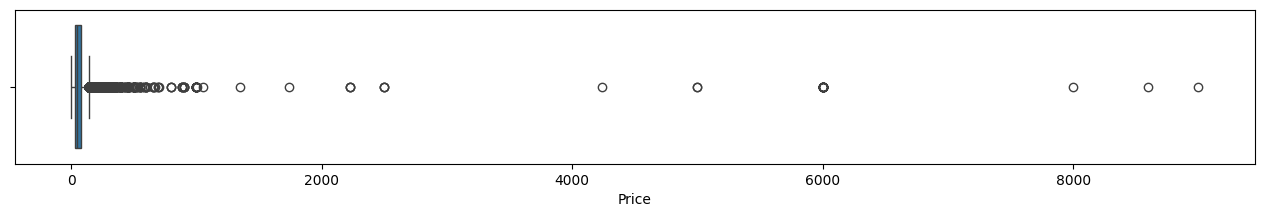

In [306]:
plt.figure(figsize=(16, 2))
sns.boxplot(df['Price'], orient='h')
plt.show()

The description of price shows that 75% of the room only charged within 70€. But we can find the maximized price is extremely large - up to 9000€.

To exclude the outlinear in this dataset, we set the data limit of 600€.

It also shows that data has 0 price, that is not make sense. So we will exclude it too.

In [307]:
# df = df[(df['Price'] <= 600) & (df['Price'] > 0)]
# df['Price'].describe()

In [308]:
df.nunique().sort_values(ascending=False)

,0
Listing ID,23536
Host ID,19772
Longitude,14851
Latitude,11821
Host Since,3085
review_date,1464
Postal Code,396
Reviews,332
Price,326
Square Feet,109


Three main insights from unique values:

- Some columns have only 1 value and can be dropped like 'Business Travel Ready'
- Some other columns have 2 values and appear to be true/false (i.e. can be recoded as 1/0)
- Certain columns have a high number of unique values, which can probably be clustered into a few relevant ones (e.g. neighbourhood, property_type)

List missing values (pre-cleaning)

In [309]:
# List missing values (pre-cleaning)
null_cols = df.columns[df.isnull().any(axis=0)]
df[null_cols].isna().sum().sort_values(ascending=False)

,0
Square Feet,23111
Host Response Rate,10490
Host Response Time,10490
Value Rating,4668
Checkin Rating,4666
Location Rating,4665
Communication Rating,4650
Accuracy Rating,4648
Cleanliness Rating,4644
Overall Rating,4622


Various features have a lot of missing values. In particular, there is an observable cut where many features have more than 4500 missing values and the rest has less than 1.000. The former - except for review_scores - shall be removed, the latter imputed.

Conclusions (selection)

- 'Square Feet' is unfortunately not available for more than half of the dataset and consequently the columns are removed
- 'Host Response Rate' and 'Host Response Time' are difficult to replace if they do not exist and if the host is not repated

Clean text From pancutations or undesired characters

## Features Selection (pre-cleaning)

1. If a categorical column is not relevant to the analysis, we can remove it.
2. Listing URL, Listing Name, Host URL, Host Name: These are mostly unique to each listing, so not useful for category reduction
3. columns with 50% missing values will be dropped like 'Square Feet'

#### List missing values

In [310]:
# List missing values (pre-cleaning)
null_cols = df.columns[df.isnull().any(axis=0)]
df[null_cols].isna().sum().sort_values(ascending=False)

,0
Square Feet,23111
Host Response Rate,10490
Host Response Time,10490
Value Rating,4668
Checkin Rating,4666
Location Rating,4665
Communication Rating,4650
Accuracy Rating,4648
Cleanliness Rating,4644
Overall Rating,4622


Various features have a lot of missing values. In particular, there is an observable cut where many features have more than 4.500 missing values and the rest has less than 1.000. The former - except for review_scores - shall be removed, the latter imputed.

#### List unique entries

In [311]:
# List unique entries per column
aggregated_df.nunique().sort_values(ascending=False)

,0
Listing URL,23536
Listing Name,22837
Host URL,19772
Host ID,19772
Review ID,19380
Reviewer ID,19372
Comments,18237
Longitude,14851
Latitude,11821
Reviewer Name,6943


Three main insights from unique values:

- Some columns have only 1 value and can be dropped
- Some other columns have 2 values and appear to be true/false (i.e. can be recoded as 1/0)
- Certain columns have a high number of unique values, which can probably be clustered into a few relevant ones (e.g. cancellation_policy, property_type)

#### Conclusions (selection) - dropping redundant columns

1. If a categorical column is not relevant to the analysis, we can remove it.
2. Listing URL, Listing Name, Host URL, Host Name: These are mostly unique to each listing, so not useful for category reduction
3. columns with more than 50% missing values will be dropped like 'Square Feet'
4. 'Comment' columns can be dropped as it was stored in separated dataset
5. 'Business Travel Ready' has one value and can be dropped

In [312]:
# drop the columns that is not helpful for prediction
df = df.drop(columns=['Square Feet', 'Business Travel Ready'])

### Reduce Large Categories

1. Group Rare Categories: If a categorical column has many unique values, we can group infrequent categories into an "Other" category like 'Reviewer Name'.
2. Merge Similar Categories: If there are similar categories (e.g., different spellings or formats of the same category), we can merge them.
3. Binning: For numerical categories (like "Overall Rating" or "Accommodates"), we can create bins to reduce the number of unique values.

In [313]:
# # Fix Postal Code incorrect values, remove '\n' and other irrelevant text
# df['Postal Code'] = df['Postal Code'].astype(str).str[:5]

# 1. Clean Text: Perform text cleaning, remove currency symbols & commas
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Host Response Rate'] = df['Host Response Rate'].replace('[\%,]', '', regex=True).astype(float)
df['Host Response Rate'] = df['Host Response Rate'].astype(float)

# 2. Grouping neighbourhoods into Neighborhood Groups
if 'Neighborhood Group' in df.columns:
  neighbourhood_mapping = df.groupby('neighbourhood')['Neighborhood Group'].first()
  df['Neighbourhood Grouped'] = df['neighbourhood'].map(neighbourhood_mapping)

# 3. Reducing Property Types
property_mapping = {
    "Villa": "Vacation Rental",
    "Cottage": "Vacation Rental",
    "Bungalow": "Vacation Rental",
    "Cabin": "Vacation Rental",
    "Tiny house": "Vacation Rental",
    "Earth house": "Vacation Rental",
    "Treehouse": "Vacation Rental",
    "Hut": "Vacation Rental",
    "Barn": "Vacation Rental",
    "Houseboat": "Boats & Houseboats",
    "Boat": "Boats & Houseboats",
    "Camper/RV": "Mobile/Alternative Lodging",
    "Cave": "Mobile/Alternative Lodging",
    "Pension (South Korea)": "Mobile/Alternative Lodging",
    "Casa particular (Cuba)": "Mobile/Alternative Lodging",
}

# Apply mapping and assign 'Other' to rare categories
top_property_types = [
    "Apartment", "Loft", "House", "Townhouse", "Condominium", "Serviced apartment",
    "Hotel", "Hostel", "Guesthouse", "Bed and breakfast", "Boutique hotel"
]

df['Property Type Reduced'] = df['Property Type'].apply(
    lambda x: property_mapping.get(x, x) if x in top_property_types or x in property_mapping else "Other"
)

# 4. Binning Postal Codes (first two digits represent broad area)
df['Postal Code Reduced'] = df[df['Postal Code'].notna()]['Postal Code'].astype(str).str[:2]

### Transform/Manipulate data

In [314]:
# Extracting years from date columns -- will be moved to data proccessing stage
df['Host Since'] = pd.to_datetime(df['Host Since'])
df['Host Since Year'] = df['Host Since'].dt.year.astype('str').apply(lambda x: (x.split('.')[0]))
df['Host Since Year'] = df['Host Since Year'].apply(lambda x: None if x == 'nan' else x).astype('category')

df['Host Since Month'] = df['Host Since'].dt.month.astype('str').apply(lambda x: (x.split('.')[0]))
df['Host Since Month'] = df['Host Since Month'].apply(lambda x: None if x == 'nan' else x).astype('category')

df['Host Since Day'] = df['Host Since'].dt.day.astype('str').apply(lambda x: (x.split('.')[0]))
df['Host Since Day'] = df['Host Since Day'].apply(lambda x: None if x == 'nan' else x).astype('category')

# 5. transform true/false into bool
df['Instant Bookable'] = df['Instant Bookable'].replace({'t': True, 'f': False})
df['Is Exact Location'] = df['Is Exact Location'].replace({'t': True, 'f': False})
df['Is Superhost'] = df['Is Superhost'].replace({'t': True, 'f': False})
df['Is Superhost'] = df['Is Superhost'].astype(bool)

In [315]:
df['Host Since Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23536 entries, 0 to 23535
Series name: Host Since Year
Non-Null Count  Dtype   
--------------  -----   
23515 non-null  category
dtypes: category(1)
memory usage: 23.5 KB


In [316]:
df['Host Since Year'].isna().sum()

21

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23536 entries, 0 to 23535
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Listing ID             23536 non-null  int64         
 1   Accomodates            23536 non-null  float64       
 2   Accuracy Rating        18888 non-null  float64       
 3   Bathrooms              23507 non-null  float64       
 4   Bedrooms               23516 non-null  float64       
 5   Beds                   23501 non-null  float64       
 6   Checkin Rating         18870 non-null  float64       
 7   Cleanliness Rating     18892 non-null  float64       
 8   Communication Rating   18886 non-null  float64       
 9   Guests Included        23536 non-null  float64       
 10  Host ID                23536 non-null  float64       
 11  Latitude               23536 non-null  float64       
 12  Location Rating        18871 non-null  float64       
 13  L

### Pre-EDA (Exploratory Data Analysis)

Clean and drop redundant and duplicated columns before EDA

In [318]:
# https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/georef-germany-postleitzahl/records?limit=20&refine=lan_name%3A%22Berlin%22

In [319]:
df_EDA = df.copy()
df_EDA.to_pickle("/content/drive/My Drive/Airbnb/df_EDA.pkl")

In [320]:
# cleaned_df = pd.read_pickle('/content/drive/My Drive/Airbnb/df_EDA.pkl')
# cleaned_df.info()

In [321]:
cleaned_df['Postal Code Reduced'].isna().sum()

585